In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [2]:
#Fetch Images count from Folders

In [9]:
count = 0 
path = 'C:\\Users\\vsure\\.vscode\\AIML\\Flower Recognization CNN Model\\Images'
dirs = os.listdir(path)
for dir in dirs:
    files = list(os.listdir(path + '\\' + dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count = count + len(files)
print('Images Folder has ' + str(count) + ' Images')


daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images Folder has 4317 Images


In [10]:
#Load Images into Arrays as Dataset

In [11]:
base_dir = 'C:\\Users\\vsure\\.vscode\\AIML\\Flower Recognization CNN Model\\Images'
img_size = 180
batch = 32

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [13]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [14]:
import matplotlib.pyplot as plt

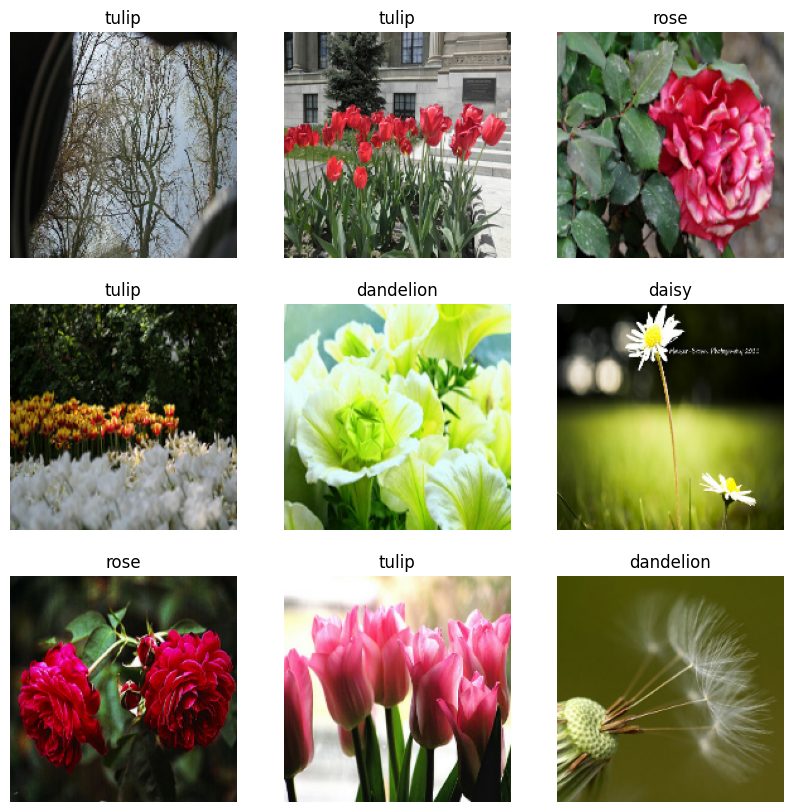

In [19]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [20]:
AUTOTUNE = tf.data.AUTOTUNE

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [22]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [23]:
#Data Augmentation

In [24]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

c:\Users\vsure\.vscode\AIML\Flower Recognization CNN Model\venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


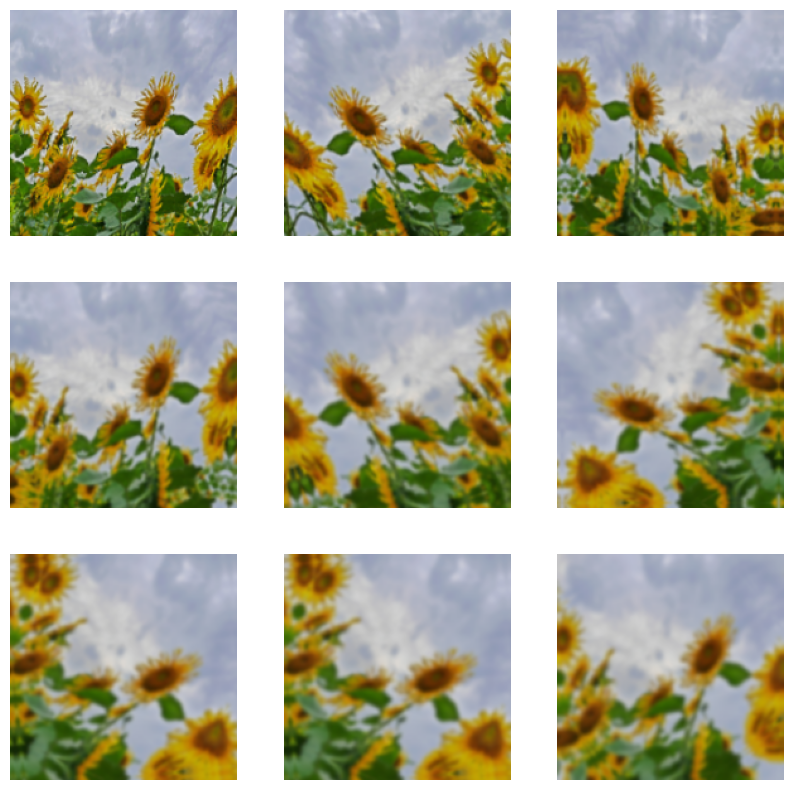

In [29]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [26]:
#Model Creation

In [30]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15


108/108 ━━━━━━━━━━━━━━━━━━━━ 83s 719ms/step - accuracy: 0.3411 - loss: 1.5564 - val_accuracy: 0.5411 - val_loss: 1.1512
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 69s 639ms/step - accuracy: 0.5710 - loss: 1.0738 - val_accuracy: 0.5886 - val_loss: 1.0572
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 65s 599ms/step - accuracy: 0.6137 - loss: 0.9692 - val_accuracy: 0.6315 - val_loss: 0.9324
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 65s 604ms/step - accuracy: 0.6481 - loss: 0.9204 - val_accuracy: 0.6176 - val_loss: 0.9876
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 65s 599ms/step - accuracy: 0.6602 - loss: 0.8645 - val_accuracy: 0.6477 - val_loss: 0.8960
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 64s 594ms/step - accuracy: 0.6866 - loss: 0.8033 - val_accuracy: 0.6756 - val_loss: 0.8156
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 63s 588ms/step - accuracy: 0.6939 - loss: 0.7924 - val_accuracy: 0.7068 - val_loss: 0.7750
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 66s 609ms/step - accuracy: 0.7104 - loss: 0.7624 - val

In [34]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [37]:
classify_images(r'C:\Users\vsure\.vscode\AIML\Flower Recognization CNN Model\Images\daisy\5547758_eea9edfd54_n.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


'The Image belongs to daisy with a score of 98.98035'

In [38]:
model.save('Flower_Recog_Model.h5')